# Extreme Temperature Comparison of Azerbaijan in 2020 Against 2005-2019

This project os about comparison of extreme temperatures in Azerbaijan in 2020 against 2005-2019 period. The data is retreived from [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily) and includes information from 15 different stations located in Azerbaijan. The dataset contatins the geographical locations and names of the stations, along with daily TMAX(Maximum temperature measured in F), TMIN(Minimum temperature measured in F) values.

In [1]:
%matplotlib notebook
import numpy as np
import os

<IPython.core.display.Javascript object>


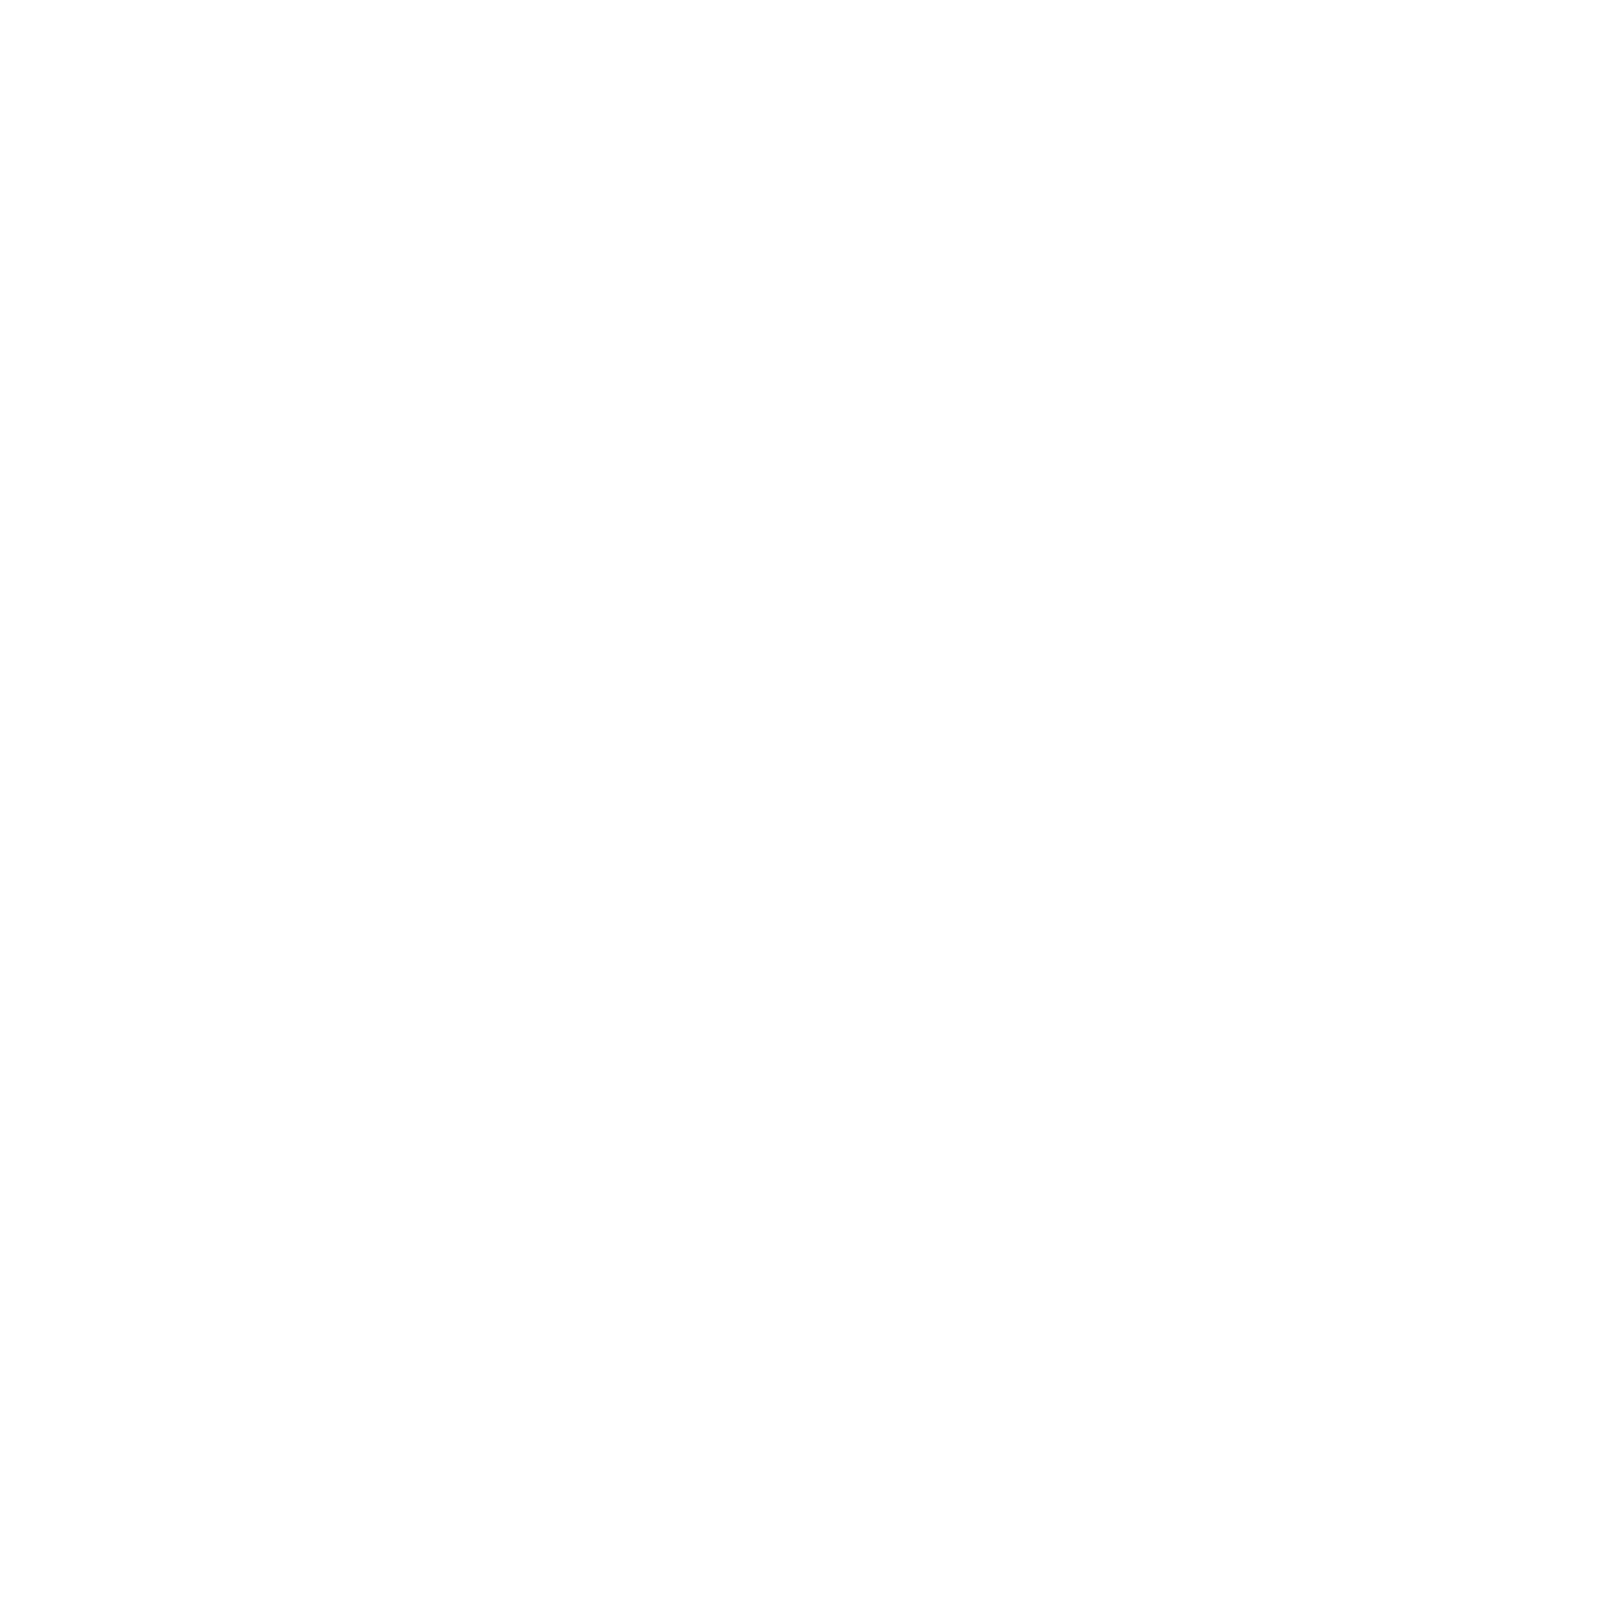

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mplleaflet/mplexporter/exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
# Plotting the stations on the map that the data got from
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations():
    global df
    df = pd.read_csv('data/aze/data.csv')
    stations = df['STATION'].unique()
    
    lons = []
    lats = []
    for station in stations:
        lons.append(df[df.STATION == station].iloc[0]['LONGITUDE'])
        lats.append(df[df.STATION == station].iloc[0]['LATITUDE'])
    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='g', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations()

In [3]:
# Converting tenths of celcius to celcius
temp_df = df.copy()
temp_df['TMAX'] = (temp_df['TMAX'] - 32) * 5 / 9
temp_df['TMIN'] = (temp_df['TMIN'] - 32) * 5 / 9

In [4]:
# Created extra Year and Month-Day columns from date field and converted DATE field into date time format of pandas.
temp_df['Year'] = temp_df['DATE'].apply(lambda x: x[:4])
temp_df['Month-Day'] = temp_df['DATE'].apply(lambda x: x[5:])
temp_df['TMAX'] = temp_df['TMAX'].apply(pd.to_numeric)
temp_df['TMIN'] = temp_df['TMIN'].apply(pd.to_numeric)
temp_df['DATE'] = temp_df['DATE'].apply(pd.to_datetime)

In [5]:
# Excluded leap days
temp_df = temp_df[~((temp_df.DATE.dt.month == 2) & (temp_df.DATE.dt.day == 29))]

In [6]:
# Separated Date into 2020 and other
df_temp_20 = temp_df[temp_df['Year'] == '2020']
df_temp = temp_df[(temp_df['Year'] != '2020') & (temp_df['Year'] != '2021')]

In [7]:
# Got means of max and min temperature over years other than 2020 over several stations
temp_max = df_temp.groupby('Month-Day')['TMAX'].agg(Mean = np.nanmean)
temp_min = df_temp.groupby('Month-Day')['TMIN'].agg(Mean = np.nanmean)

# Got means of max and min temperature of 2020 over several stations
temp_max_20 = df_temp_20.groupby('Month-Day')['TMAX'].agg(Mean = np.nanmean)
temp_min_20 = df_temp_20.groupby('Month-Day')['TMIN'].agg(Mean = np.nanmean)

In [8]:
temp_min_20.head()

Mean
Month-Day          
01-01      0.972222
01-02      1.888889
01-03      1.527778
01-04     -0.370370
01-05      0.185185

In [9]:
# Resetting index
temp_min = temp_min.reset_index()
temp_max = temp_max.reset_index()

temp_min_20 = temp_min_20.reset_index()
temp_max_20 = temp_max_20.reset_index()

In [10]:
temp_max_20.head()

Month-Day       Mean
0     01-01  10.000000
1     01-02   8.666667
2     01-03   6.203704
3     01-04   6.666667
4     01-05   8.148148

In [11]:
# Finding the extreme temperatures which are either greater than the mean of maximum temperatures over 2005-2019 
# period, or less than the mean of minimum temperatures over 2005-2019 period. 
broken_max = (temp_max_20[temp_max_20['Mean'] > temp_max['Mean']]).index.tolist()
broken_min = (temp_min_20[temp_min_20['Mean'] < temp_min['Mean']]).index.tolist()

<IPython.core.display.Javascript object>


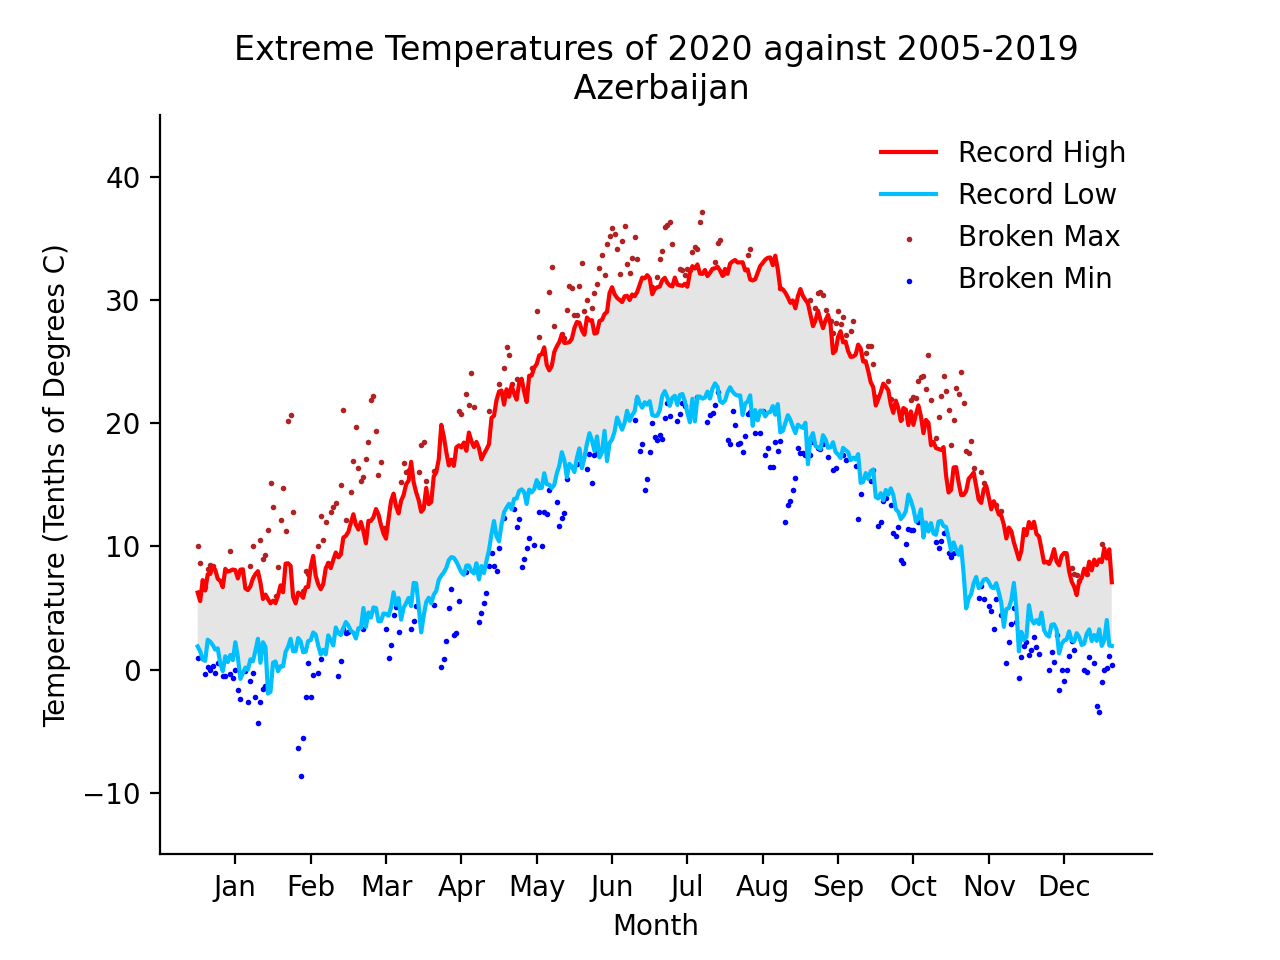

In [12]:
# Plotting the graphs
plt.figure()
plt.plot(temp_max['Mean'], 'red', label = 'Record High')
plt.plot(temp_min['Mean'], 'deepskyblue', label = 'Record Low')

plt.scatter(broken_max, temp_max_20['Mean'].iloc[broken_max], s = 1, c = 'firebrick', label = 'Broken Max')
plt.scatter(broken_min, temp_min_20['Mean'].iloc[broken_min], s = 1, c = 'b', label = 'Broken Min')

In [13]:
# Labeling the Graph
plt.xlabel('Month')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Extreme Temperatures of 2020 against 2005-2019\n Azerbaijan')

Text(0.5, 1.0, 'Extreme Temperatures of 2020 against 2005-2019\n Azerbaijan')

In [14]:
# Filling the area between two means
plt.gca().fill_between(range(len(temp_min)), 
                       temp_min['Mean'], temp_max['Mean'], 
                       facecolor='gray', 
                       alpha=0.2)

In [15]:
# Setting limits for axes
plt.gca().axis([-15, 380, -15, 45])
plt.legend(frameon = False)

In [16]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [17]:
a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
b = [i+15 for i in a]
Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(b, Month_name)

([<matplotlib.axis.XTick at 0x7ff01a8ef730>,
 [Text(15, 0, 'Jan'),
  Text(45, 0, 'Feb'),
  Text(75, 0, 'Mar'),
  Text(105, 0, 'Apr'),
  Text(135, 0, 'May'),
  Text(165, 0, 'Jun'),
  Text(195, 0, 'Jul'),
  Text(225, 0, 'Aug'),
  Text(255, 0, 'Sep'),
  Text(285, 0, 'Oct'),
  Text(315, 0, 'Nov'),
  Text(345, 0, 'Dec')])